<a href="https://colab.research.google.com/github/manoj-nain/AIChamp/blob/master/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
data = tf.keras.datasets.cifar10

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = data.load_data()

In [ ]:
X_train_full.shape

(50000, 32, 32, 3)

In [ ]:
y_train_full.shape

(50000, 1)

In [ ]:
print(X_train_full[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [ ]:
print(y_train_full[0])

[6]


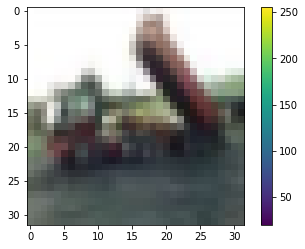

In [ ]:
plt.figure()
plt.imshow(X_train_full[2])
plt.colorbar()
plt.grid(False)

plt.show()

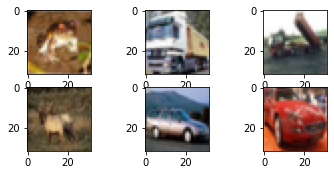

In [ ]:
for i in range(6):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train_full[i])
plt.show()

# Image Whitening

In [ ]:
data = tf.keras.datasets.cifar10

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = data.load_data()

In [ ]:

X_white = X_train_full.reshape(X_train_full.shape[0], X_train_full.shape[1]*X_train_full.shape[2]*X_train_full.shape[3])
print(X_white.shape)

(50000, 3072)


In [ ]:
def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(32,32,3))
    plt.grid(None)
    plt.show()
    plt.close()

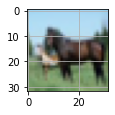

In [ ]:
plotImage(X_white[12, :])

In [ ]:
X_norm = X_white/ 255.
print('X.min()', X_norm.min())
print('X.max()', X_norm.max())

X.min() 0.0
X.max() 1.0


In [ ]:
X_norm.mean(axis=0).shape

(3072,)

In [ ]:
X_norm.mean(axis=0)

array([0.51259114, 0.53355349, 0.51981882, ..., 0.49662384, 0.49353059,
       0.44855631])

In [ ]:
X_norm = X_norm - X_norm.mean(axis=0)

In [ ]:
cov = np.cov(X_norm, rowvar=False)

In [ ]:
U,S,V = np.linalg.svd(cov)

In [ ]:
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm.T).T

In [ ]:
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print('min:', X_ZCA_rescaled.min())
print('max:', X_ZCA_rescaled.max())

min: 0.0
max: 1.0


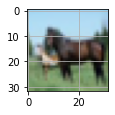

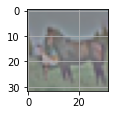

In [ ]:
plotImage(X_white[12, :])
plotImage(X_ZCA_rescaled[12, :])

In [ ]:
X_ZCA_rescaled.shape

(50000, 3072)

In [ ]:
X_valid, X_train = X_ZCA_rescaled[:5000], X_ZCA_rescaled[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
model = keras.models.Sequential()
#model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="adam",
metrics=["accuracy"])

In [ ]:
history5 = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1407/1407 [==============================] - 30s 22ms/step - loss: 2.3115 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.0906
Epoch 2/30
1407/1407 [==============================] - 30s 21ms/step - loss: 2.3029 - accuracy: 0.0989 - val_loss: 2.3028 - val_accuracy: 0.0996
Epoch 3/30
1407/1407 [==============================] - 30s 21ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.1038
Epoch 4/30
1407/1407 [==============================] - 30s 21ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.0972
Epoch 5/30
1407/1407 [==============================] - 30s 21ms/step - loss: 2.3036 - accuracy: 0.1000 - val_loss: 2.3029 - val_accuracy: 0.0920
Epoch 6/30
1407/1407 [==============================] - 30s 22ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3028 - val_accuracy: 0.0996
Epoch 7/30
1407/1407 [==============================] - 30s 21ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3031 -

# Data Agumentation

In [ ]:


import numpy as np                                
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils

In [ ]:
data = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = data.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

In [ ]:
batch_size = 64

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

In [ ]:
X_valid, X_train = x_train[:5000], x_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [ ]:
from keras.callbacks import LearningRateScheduler

In [ ]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=X_train.shape[0] // batch_size,epochs=20,\
                    verbose=1,validation_data=(X_valid,y_valid)) 

Epoch 1/20
703/703 [==============================] - 35s 50ms/step - loss: 0.9224 - accuracy: 0.6706 - val_loss: 0.9806 - val_accuracy: 0.6546
Epoch 2/20
703/703 [==============================] - 35s 50ms/step - loss: 0.9072 - accuracy: 0.6753 - val_loss: 0.9908 - val_accuracy: 0.6544
Epoch 3/20
703/703 [==============================] - 35s 50ms/step - loss: 0.9035 - accuracy: 0.6751 - val_loss: 0.9932 - val_accuracy: 0.6560
Epoch 4/20
703/703 [==============================] - 35s 50ms/step - loss: 0.9076 - accuracy: 0.6746 - val_loss: 0.9938 - val_accuracy: 0.6554
Epoch 5/20
703/703 [==============================] - 35s 50ms/step - loss: 0.9051 - accuracy: 0.6766 - val_loss: 1.0038 - val_accuracy: 0.6554
Epoch 6/20
703/703 [==============================] - 35s 50ms/step - loss: 0.9075 - accuracy: 0.6740 - val_loss: 1.0013 - val_accuracy: 0.6538
Epoch 7/20
703/703 [==============================] - 35s 50ms/step - loss: 0.9003 - accuracy: 0.6791 - val_loss: 0.9940 - val_accuracy:

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0437 - accuracy: 0.6415


[1.0436955690383911, 0.6414999961853027]

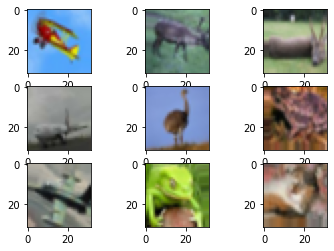

In [ ]:
# see example augmentation images
for X_batch, y_batch in datagen.flow(X_train_full, y_train_full, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

In [ ]:

# plotting helper function
def plothist(hist):
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# End of Agument


In [ ]:
# X_valid, X_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0
# y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(400, activation="relu"))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(Dropout(0.2))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 800)               2458400   
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 2,819,910
Trainable params: 2,819,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [ ]:
history5 = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1407/1407 [==============================] - 25s 18ms/step - loss: 1.7845 - accuracy: 0.3649 - val_loss: 1.6110 - val_accuracy: 0.4334
Epoch 2/30
1407/1407 [==============================] - 25s 18ms/step - loss: 1.6710 - accuracy: 0.4058 - val_loss: 1.5365 - val_accuracy: 0.4544
Epoch 3/30
1407/1407 [==============================] - 25s 18ms/step - loss: 1.6058 - accuracy: 0.4308 - val_loss: 1.5002 - val_accuracy: 0.4698
Epoch 4/30
1407/1407 [==============================] - 25s 18ms/step - loss: 1.5493 - accuracy: 0.4499 - val_loss: 1.4629 - val_accuracy: 0.4854
Epoch 5/30
1407/1407 [==============================] - 26s 18ms/step - loss: 1.5121 - accuracy: 0.4643 - val_loss: 1.4411 - val_accuracy: 0.4996
Epoch 6/30
1407/1407 [==============================] - 27s 19ms/step - loss: 1.4777 - accuracy: 0.4774 - val_loss: 1.4219 - val_accuracy: 0.5038
Epoch 7/30
1407/1407 [==============================] - 26s 18ms/step - loss: 1.4424 - accuracy: 0.4879 - val_loss: 1.4146 -

In [ ]:

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

NameError: ignored

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 295.8722 - accuracy: 0.4057


[295.8721618652344, 0.4056999981403351]

In [ ]:
from keras import callbacks 
earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 5,  
                                        restore_best_weights = True) 
  
history = model.fit(X_train, y_train, epochs = 120,validation_data=(X_valid, y_valid),callbacks =[earlystopping]) 

Epoch 1/120
1407/1407 [==============================] - 20s 14ms/step - loss: 1.8593 - accuracy: 0.3321 - val_loss: 1.9764 - val_accuracy: 0.2880
Epoch 2/120
1407/1407 [==============================] - 24s 17ms/step - loss: 1.6669 - accuracy: 0.4075 - val_loss: 1.6458 - val_accuracy: 0.4064
Epoch 3/120
1407/1407 [==============================] - 20s 14ms/step - loss: 1.5858 - accuracy: 0.4365 - val_loss: 1.8235 - val_accuracy: 0.3572
Epoch 4/120
1407/1407 [==============================] - 20s 15ms/step - loss: 1.5258 - accuracy: 0.4584 - val_loss: 1.5803 - val_accuracy: 0.4276
Epoch 5/120
1407/1407 [==============================] - 21s 15ms/step - loss: 1.4817 - accuracy: 0.4732 - val_loss: 1.5627 - val_accuracy: 0.4496
Epoch 6/120
1407/1407 [==============================] - 21s 15ms/step - loss: 1.4369 - accuracy: 0.4921 - val_loss: 1.7136 - val_accuracy: 0.3932
Epoch 7/120
1407/1407 [==============================] - 20s 14ms/step - loss: 1.3998 - accuracy: 0.5002 - val_loss: 1

In [ ]:
history.params

{'epochs': 120, 'steps': 1407, 'verbose': 1}